# We cannot user Closed form solution to a problem all the time like in Regression. So, Gradient descent is a great tool to bypass such issues 

In [2]:
# import packages
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [36]:
# Creating a Singular Matrix
N = 10
D = 3
X = np.zeros((N,D))
X[:,0] = 1
X[:5,1] = 1
X[5:,2] = 1

y = np.array([0]*5 + [1]*5) # Target

In [37]:
X

array([[1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 1., 0.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.],
       [1., 0., 1.]])

In [38]:
y

array([0, 0, 0, 0, 0, 1, 1, 1, 1, 1])

In [39]:
# Applying Closed form solution to find W in Regression
w = np.linalg.solve(np.dot(X.T,X), np.dot(X.T,y))

LinAlgError: Singular matrix

### Error Occurend due to trying to Invert a Singular Matrix. This type of regression solution cannot be solved using this way

In [40]:
# update rule
def update_rule(w, lr, error):
    w = w - lr*np.dot(X.T, error)
    return w

In [41]:
# Gradient Descent
def Gradient_Descent(X, y, w, lr, iterations):
    cost = []
    for i in range(iterations):
        Yhat = np.dot(X,w)
        error = Yhat - y
        w = update_rule(w, lr, error)
        mse = np.dot(error,error) / X.shape[0] # Mean Squared Error
        cost.append(mse)
        
    return w, cost

In [42]:
# Hyperparameters
learning_rate = 0.1
iterations = 20
w = np.random.randn(D) / np.sqrt(D) # Initializing Random Weights with Variance 1/D

# Apply GD
w, cost = Gradient_Descent(X,y,w,learning_rate,iterations)

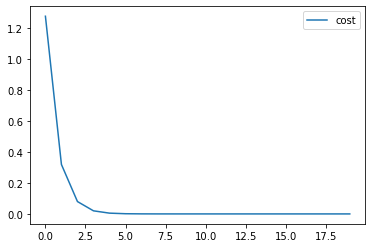

In [43]:
# plot the cost
plt.plot(cost, label="cost")
plt.legend()
plt.show()

In [44]:
# Weights
w

array([ 0.75180285, -0.75180148,  0.2481978 ])

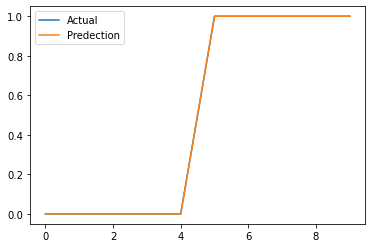

In [49]:
# Predictions
Yhat = np.dot(X,w)

# Plot the graph
plt.plot(y, label="Actual")
plt.plot(Yhat, label="Predection")
plt.legend()
plt.show()